In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras

In [3]:
from tensorflow.keras import layers

In [4]:
mnist = keras.datasets.mnist

In [6]:
mnist_digits = mnist.load_data()

11490434/11490434 [==============================] - 27s 2us/step


In [10]:
(x_train, y_train), (x_test, y_test) = mnist_digits

In [13]:
print(f"Training x:{x_train.shape} and y:{y_train.shape}")
print(f"Testing x:{x_test.shape} and y:{y_test.shape}")

Training x:(60000, 28, 28) and y:(60000,)
Testing x:(10000, 28, 28) and y:(10000,)


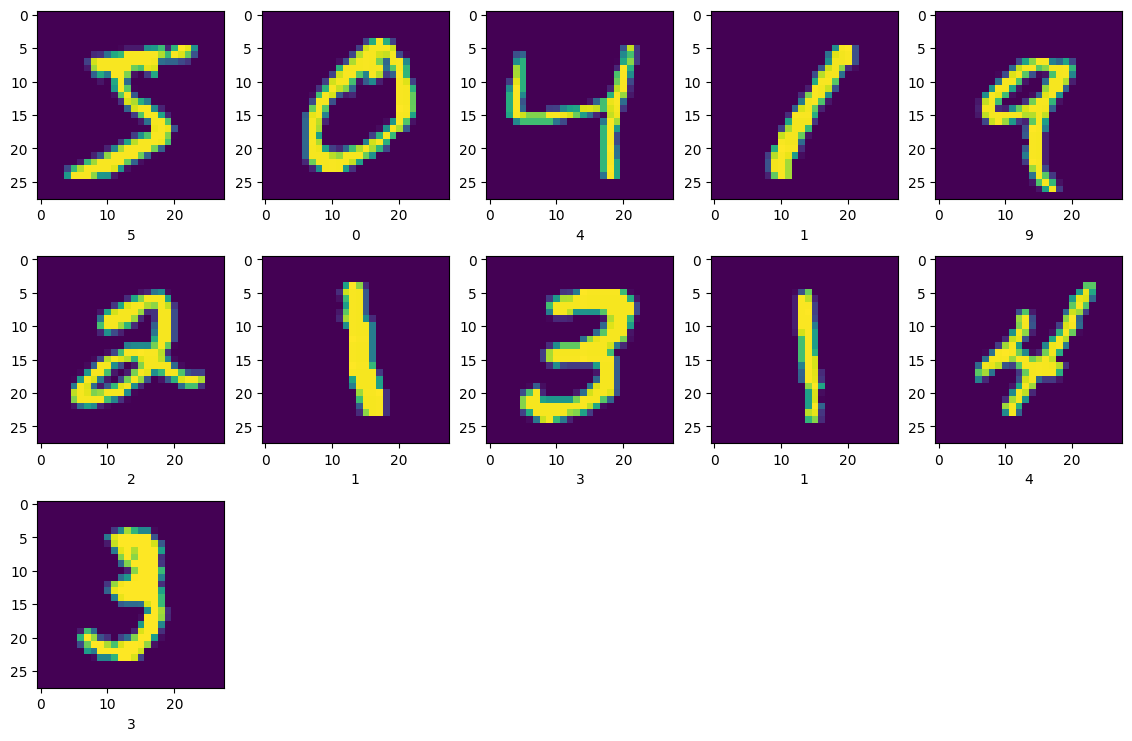

In [30]:
plt.figure(figsize=(14,9))
for i in range(0,11):
    plt.subplot(3,5,i+1)
    plt.xlabel(y_train[i])
    plt.imshow(x_train[i]);

In [31]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [33]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [37]:
model = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [38]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [39]:
model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 35s 72ms/step - loss: 0.3632 - accuracy: 0.8892 - val_loss: 0.0902 - val_accuracy: 0.9755
Epoch 2/15
422/422 [==============================] - 36s 84ms/step - loss: 0.1176 - accuracy: 0.9636 - val_loss: 0.0653 - val_accuracy: 0.9818
Epoch 3/15
422/422 [==============================] - 29s 69ms/step - loss: 0.0895 - accuracy: 0.9719 - val_loss: 0.0531 - val_accuracy: 0.9855
Epoch 4/15
422/422 [==============================] - 30s 71ms/step - loss: 0.0751 - accuracy: 0.9767 - val_loss: 0.0474 - val_accuracy: 0.9857
Epoch 5/15
422/422 [==============================] - 30s 70ms/step - loss: 0.0661 - accuracy: 0.9794 - val_loss: 0.0424 - val_accuracy: 0.9878
Epoch 6/15
422/422 [==============================] - 32s 75ms/step - loss: 0.0593 - accuracy: 0.9811 - val_loss: 0.0426 - val_accuracy: 0.9877
Epoch 7/15
422/422 [==============================] - 31s 74ms/step - loss: 0.0541 - accuracy: 0.9830 - val_loss: 0.0397 - val_accuracy:

In [40]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02560354582965374
Test accuracy: 0.9919999837875366
